# Exploratory Data Analysis of COVID Data
all data used is downloaded from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University, link: https://github.com/CSSEGISandData/COVID-19

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

GlobalCases=pd.read_csv('time_series_covid19_confirmed_global.csv')
GlobalDeaths=pd.read_csv('time_series_covid19_deaths_global.csv')

USCases=pd.read_csv('time_series_covid19_confirmed_US.csv')
USDeaths=pd.read_csv('time_series_covid19_deaths_US.csv')

First let us write some helper functions

In [3]:
def get_cases(country="global",province=None, county=None ):
    """"
    gets an np.array of the number of total cases in a certain county/province/country per day
    
    country, the country whose cases we want to get
    
    province, the province whose cases we want to get, if this is None, then a sum of all of the cases in a country
    
    county (US only), the county whose cases we want to get, if this is None then sum all of the cases in the province
    """
    #if country = US
    if country == 'US':
        #dataframe=copy(USCases)
        dataframe=USCases.copy(deep=True)
        #if province != None
        if province !=None:
            #dataframe=get all rows where dataframe['Province_State']==province
            dataframe=dataframe[dataframe['Province_State']==province]
            #if county != None
            if county != None:
                #dataframe=all rows where dataframe['Admin2']==county
                dataframe==dataframe[dataframe['Admin2'==county]]
        CaseArray=np.array(dataframe[dataframe.columns[12:]]).sum(axis=0)
    elif country=="global":
        CaseArray=np.array(USCases[USCases.columns[12:]]).sum(axis=0)+\
            np.array(GlobalCases[GlobalCases.columns[5:]]).sum(axis=0)
    #else
    else:
        
        dataframe=GlobalCases.copy(deep=True)
        dataframe=dataframe[dataframe['Country/Region']==country]
        if province!= None:
            dataframe=dataframe[dataframe["Province/State"]==province]
        CaseArray=np.array(dataframe[dataframe.columns[4:]]).np.sum(axis=0)
    return CaseArray

In [4]:
def get_deaths(country="global",province=None, county=None ):
    """"
    gets an np.array of the number of total deaths in a certain county/province/country every day day
    
    country, the country whose deaths we want to get
    
    province, the province whose deaths we want to get, if this is None, then a sum of all of the deaths in a country
    
    county (US only), the county whose deaths we want to get, if this is None then sum all of the deaths in the province
    """
    #if country = US
    if country == 'US':
        #dataframe=copy(USDeaths)
        dataframe=USDeaths.copy(deep=True)
        #if province != None
        if province !=None:
            #dataframe=get all rows where dataframe['Province_State']==province
            dataframe=dataframe[dataframe['Province_State']==province]
            #if county != None
            if county != None:
                #dataframe=all rows where dataframe['Admin2']==county
                dataframe==dataframe[dataframe['Admin2'==county]]
        CaseArray=np.array(dataframe[dataframe.columns[13:]]).sum(axis=0)
    #elif if country = global
    elif country=="global":
        CaseArray=np.array(USDeaths[USDeaths.columns[13:]]).sum(axis=0)+\
            np.array(GlobalDeaths[GlobalDeaths.columns[5:]]).sum(axis=0)
    #else
    else:
        
        dataframe=GlobalDeaths.copy(deep=True)
        dataframe=dataframe[dataframe['Country/Region']==country]
        if province!= None:
            dataframe=dataframe[dataframe["Province/State"]==province]
        CaseArray=np.array(dataframe[dataframe.columns[5:]]).np.sum(axis=0)
    return CaseArray

In [5]:
def make_ticks(start_date=None,end_date=None,n_days=None, step=30):
    """
    returns the locations and date labels of the X-ticks, these ticks are sepperated by step days
    
    of the first three parameters, two are required
    """
    if start_date!=None:
        StartTimeDate=datetime.strptime(start_date, '%m/%d/%y')
    if end_date!=None:
        EndTimeDate=datetime.strptime(start_date, '%m/%d/%y')
    try:
        StartTimeDate=EndTimeDate-timedelta(days=n_days)
    #if end_date==None then NameError would be raised
    except NameError:
        EndTimeDate=StartTimeDate+timedelta(days=n_days)
    
    ticks=np.array([])
    dates=np.array([])
    n=0
    CurrentDateTime=StartTimeDate
    while CurrentDateTime <EndTimeDate:
        ticks=np.append(ticks,n)
        dates=np.append(dates,CurrentDateTime.strftime('%m/%d/%y'))
        CurrentDateTime+=timedelta(days=step)
        n+=step
    return ticks,dates

Okay, now let us write a simple function that plots out the data and some important events

In [6]:
def simple_plot(data,title, y_label, start_date='1/23/20',events={}, log=False):
    """
    plots out data with title tile and y label y_label
    
    events is a dict of important events
    event_name:[date,color]
    """
    fig=plt.figure()
    
    
    plt.plot(data)
    x,ticks=make_ticks(start_date='1/23/20',n_days=data.shape[0])
    plt.xticks(x,ticks)
    
    fig.suptitle(title)
    
    
    
    plt.ylabel(y_label)
    
    StartDateTime=datetime.strptime(start_date, '%m/%d/%y')
    
    for event in events.keys():
        DateTime=datetime.strptime(events[event][0], '%m/%d/%y')
        plt.axvline((DateTime-StartDateTime).days,color=events[event][1],linestyle='dashed',label=event)
    if events!={}:
        plt.legend()
    if log!=False:
        plt.yscale('log')

With this function we have written we can plot out some data such as the Global and American cases in both linear and log scale.

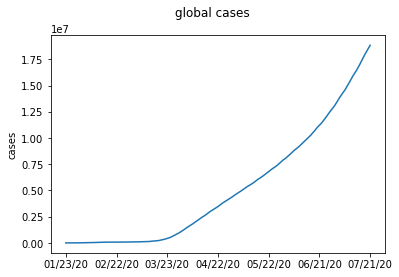

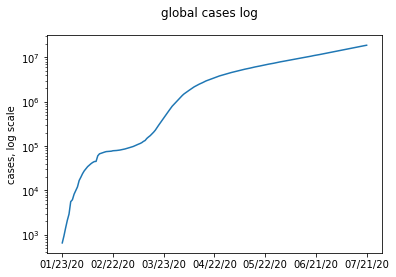

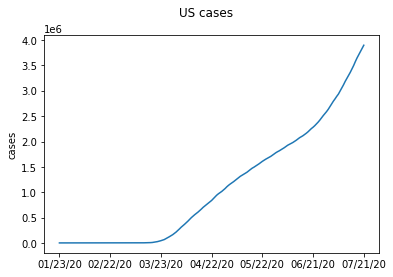

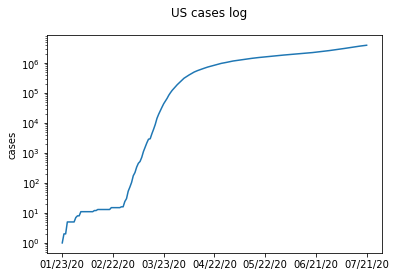

In [7]:
if __name__=="__main__":
    globalcases=get_cases()
    simple_plot(globalcases,"global cases","cases",log=False)
    simple_plot(globalcases,"global cases log","cases, log scale",log=True)

    AmericaCases=get_cases('US')
    simple_plot(AmericaCases,"US cases","cases",log=False,)
    simple_plot(AmericaCases,"US cases log","cases",log=True)
    

For the next step let us write a function so that we can plot out multiple data arrays on the same plot and thus compare them.

In [11]:
def compare_plots(datas,title,y_label,start_date='1/23/20',events={},log_scale=False):
    """
    plots each entry in datas(dict) in one plot
    datas={'label':[data,color]}
    """
    fig=plt.figure()
    
    for label in datas.keys():
        plt.plot(datas[label][0],color=datas[label][1],label=label)
        
    x,ticks=make_ticks(start_date='1/23/20',n_days=datas[label][0].shape[0])
    plt.xticks(x,ticks)

    fig.suptitle(title)
    
    
    plt.ylabel(y_label)
    
    StartDateTime=datetime.strptime(start_date, '%m/%d/%y')
    
    for event in events.keys():
        DateTime=datetime.strptime(events[event][0], '%m/%d/%y')
        plt.axvline((DateTime-StartDateTime).days,color=events[event][1],linestyle='dashed',label=event)
    
    plt.legend()
    if log_scale!=False:
        plt.yscale('log')
    
    

With this function, now we can compare data such as comparing world cases and American cases.

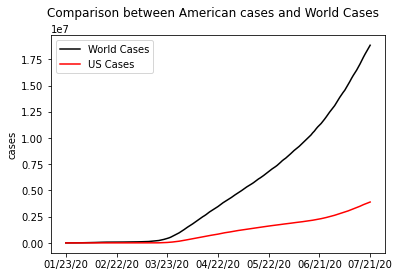

In [13]:
if __name__=="__main__":
    compare_plots({"World Cases":[globalcases,'black'],
              "US Cases":[AmericaCases,'red']},"Comparison between American cases and World Cases","cases")



We can also compare the percentage of American cases and deaths of the total cases and deaths.

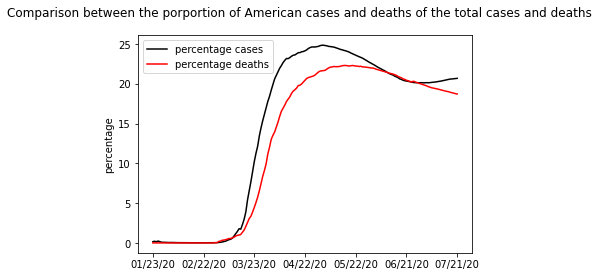

In [14]:
if __name__=="__main__":
    porportion_cases=100*AmericaCases/globalcases
    porportion_deaths=100*get_deaths('US')/get_deaths()

    compare_plots({"percentage cases":[porportion_cases,"black"],
              "percentage deaths":[porportion_deaths,"red"]},
             "Comparison between the porportion of American cases and deaths of the total cases and deaths","percentage")

Next, let us write a function that gets the delta (ie. the new cases or deaths) of a data

In [15]:
def get_delta(data):
    """
    data, np.array
    gets the delta of the data
    by definition, the delta of the first day should just be data[0,:]
    """
    d_array=np.append([0],np.diff(data))
    return d_array

Now with this function we can plot things such as the new cases every day

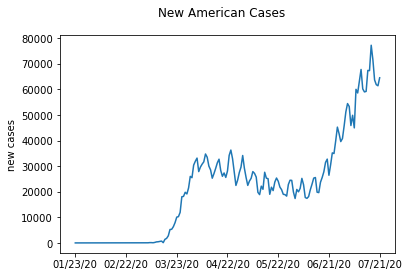

In [17]:
if __name__=="__main__":
    NewCasesUS=get_delta(AmericaCases)
    simple_plot(NewCasesUS,"New American Cases","new cases")

Looks like the data is very noisy, so lets write a function that smooths the curve out by taking the moving average over a certain number of days

In [28]:
def moving_average(data,bandwith):
    """
    gets the moving average of data, with the number of days=bandwith
    """
    moving_average_array=np.zeros(data.shape[0])
    for n in range(data.shape[0]):
        moving_average_array[n]=np.mean(data[n:n+bandwith])
    return moving_average_array
    

Okay so with this function, we can now plot the 7 day moving average of the number of new cases,

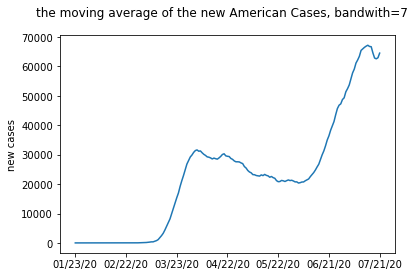

In [31]:
if __name__=="__main__":
    simple_plot(moving_average(NewCasesUS,7),"the moving average of the new American Cases, bandwith=7","new cases")